In [9]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [10]:
%%cython
import cython
import numpy as np

cdef int mandelbrot(double creal, double cimag, int maxiter):
    cdef:
        double real2, imag2
        double real = creal, imag = cimag
        int n

    for n in range(maxiter):
        real2 = real*real
        imag2 = imag*imag
        if real2 + imag2 > 2.0:
            return n
        imag = 2* real*imag + cimag
        real = real2 - imag2 + creal;
    return 0

@cython.boundscheck(False) 
@cython.wraparound(False)
cpdef mandelbrot_set(double xmin, double xmax, double ymin, double ymax, int width, int height, int maxiter):
    cdef:
        double[:] r1 = np.linspace(xmin, xmax, width)
        double[:] r2 = np.linspace(ymin, ymax, height)
        int[:,:] n3 = np.empty((width,height), np.int32)
        int i,j
    
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i], r2[j], maxiter)
     
    return (n3)


computation time 1.4954829216003418


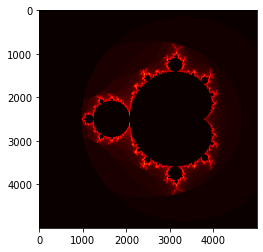

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import time

%matplotlib inline
start = time.time()
N = mandelbrot_set(-2.0,1.0,-1.5,1.5,5000,5000,80)
print("computation time", time.time()-start)
h5f = h5py.File('cython.h5', 'w')
h5f.create_dataset('dataset_1', data=N)
h5f.close()

result = np.reshape(N.T, (5000, 5000))
plt.imshow(result, cmap=plt.cm.hot)
plt.savefig('cython.png')